## Resample

### initialize parameters

In [3]:
%% Author: Lu, Chia-Feng 2013.10.18
clear, close all

org_SR=2000;  % in Hz

new_SR1=1000;
new_SR2=500;
new_SR3=300;
new_SR4=100;
new_SR5=50;

### Load Data
load EMG data with ICA 
noise elimination,the EMG data are saved as "fdata" matrix

In [4]:
load('EMG_ICA.mat')  % the EMG data are saved as "fdata" matrix
org_signal=fdata(:,1);  % in this demo, we only use the first channel
org_taxis=[1:length(fdata)]/org_SR;  % define time axis


### Resample Data
resample signal in different sampling rates

In [5]:
[p,q]=rat(new_SR1/org_SR); % get the two integer matrices that p/q aproximate new_SR1/org_SR
new_signal1=resample(org_signal,p,q);
new_taxis1=[1:length(new_signal1)]'/new_SR1;

[p,q]=rat(new_SR2/org_SR);
new_signal2=resample(org_signal,p,q);
new_taxis2=[1:length(new_signal2)]'/new_SR2;

[p,q]=rat(new_SR3/org_SR);
new_signal3=resample(org_signal,p,q);
new_taxis3=[1:length(new_signal3)]'/new_SR3;

[p,q]=rat(new_SR4/org_SR);
new_signal4=resample(org_signal,p,q);
new_taxis4=[1:length(new_signal4)]'/new_SR4;

[p,q]=rat(new_SR5/org_SR);
new_signal5=resample(org_signal,p,q);
new_taxis5=[1:length(new_signal5)]'/new_SR5;

### Data plot
plot original signal and resampled signals

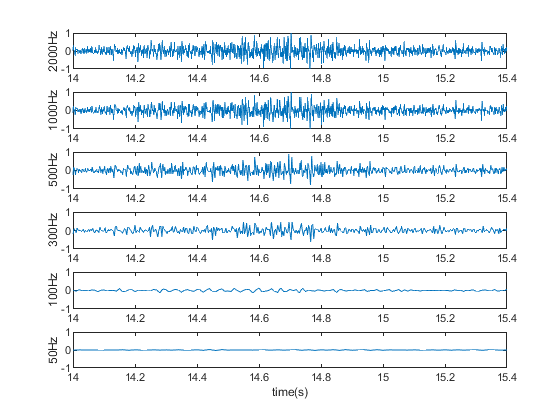

In [6]:
figure, 
subplot(6,1,1),plot(org_taxis,org_signal),axis([14 15.4 -1 1]),ylabel([num2str(org_SR) 'Hz'])
subplot(6,1,2),plot(new_taxis1,new_signal1),axis([14 15.4 -1 1]),ylabel([num2str(new_SR1) 'Hz'])
subplot(6,1,3),plot(new_taxis2,new_signal2),axis([14 15.4 -1 1]),ylabel([num2str(new_SR2) 'Hz'])
subplot(6,1,4),plot(new_taxis3,new_signal3),axis([14 15.4 -1 1]),ylabel([num2str(new_SR3) 'Hz'])
subplot(6,1,5),plot(new_taxis4,new_signal4),axis([14 15.4 -1 1]),ylabel([num2str(new_SR4) 'Hz'])
subplot(6,1,6),plot(new_taxis5,new_signal5),axis([14 15.4 -1 1]),ylabel([num2str(new_SR5) 'Hz']),xlabel('time(s)')



## Data Segment and Average

As shown in the picture below, The EEG Signal was collected when the subject lifting the right or left arm. The time stamp was stored in the stimarker.

![image-20220704111251417](https://s2.loli.net/2022/07/04/7MFJNBEGPVd9lI5.png)

* Hbdata  with size timepoints*Hb components(HbO2, Hb, Hbtotal)*channels
* taxis  records the time axis of whole series
* Stimarker  event markers, with size timepoints*numbers of event
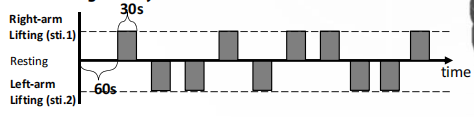

### Load Data
* the data signal was saved as "Hbdata" with size timepoints*Hb components(HbO2, Hb, Hbtotal)*channels
* the event markers were recorded in "stimarker" with size timepoints*numbers of event
* "taxis" records the time axis of whole series

In [12]:
%% Author: Lu, Chia-Feng 2013.10.18
clear, close all

%% initialize parameters
select_Hbcomp=1; % 1 for HbO2, 2 for Hb, 3 for Hb total
select_channel=5;

SR=10.42; % sampling rate in Hz
segment_tplength=round(50*SR);  % segment in 50 s

%% load fNIRS data with block design
load('fNIRSdata.mat')
% the data signal was saved as "Hbdata" with size timepoints*Hb components(HbO2, Hb, Hbtotal)*channels
% the event markers were recorded in "stimarker" with size timepoints*numbers of event
% "taxis" records the time axis of whole series
signal=Hbdata(:,select_Hbcomp,select_channel);  % we take all timepoints data for HbO2 component at channel 5 as the example

%% locate the event timepoint
% the 1st column of stimarker records the start timepoints of right-arm lifting
% the 2nd column of stimarker records the start timepoints of left-arm lifting
right_time=find(stimarker(:,1)==1);
left_time=find(stimarker(:,2)==1);

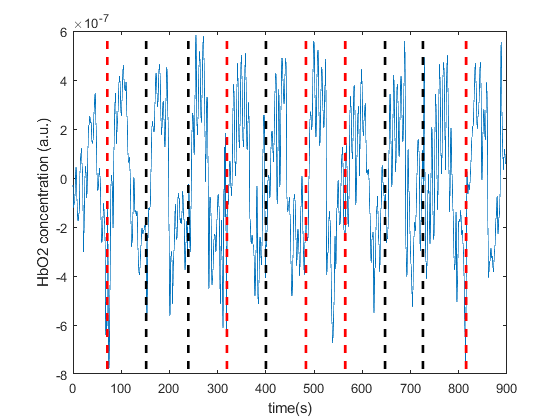

In [14]:
% plot the signal with event timepoints
figure, plot(taxis,signal), hold on
for i=1:length(right_time)
   plot([taxis(right_time(i)) taxis(right_time(i))],[min(signal) max(signal)],'r--','linewidth',2) % red for right
end
for i=1:length(left_time)
   plot([taxis(left_time(i)) taxis(left_time(i))],[min(signal) max(signal)],'k--','linewidth',2) % black for left
end
xlabel('time(s)')
ylabel('HbO2 concentration (a.u.)')


### cut signal
cut signal into segments and save as a new matrix with size    
segment length* numbers of segment

In [15]:

%% cut signal into segments and save as a new matrix with size    segment length* numbers of segment
right_Hbsegment=zeros(segment_tplength,length(right_time));
for i=1:length(right_time)
    right_Hbsegment(:,i)=signal(right_time(i):right_time(i)+segment_tplength-1);
end

left_Hbsegment=zeros(segment_tplength,length(left_time));
for i=1:length(left_time)
    left_Hbsegment(:,i)=signal(left_time(i):left_time(i)+segment_tplength-1);
end

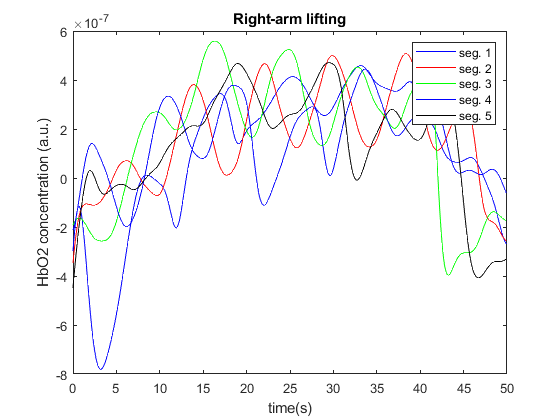

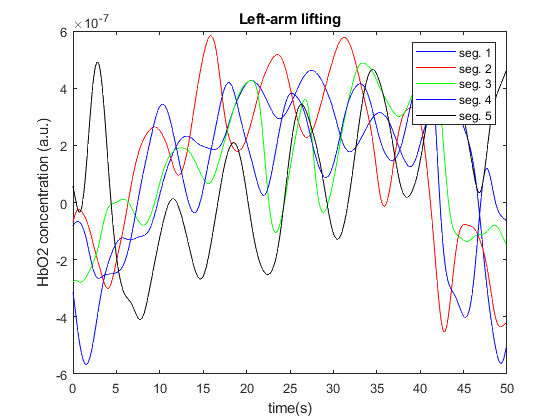

In [16]:
%% plot the segment signals
figure,
cmap='brgbk';
for i=1:length(right_time)
    plot(taxis(1:segment_tplength),right_Hbsegment(:,i),'color',cmap(i)),hold on
end
xlabel('time(s)')
ylabel('HbO2 concentration (a.u.)')
title('Right-arm lifting')
legend('seg. 1','seg. 2','seg. 3','seg. 4','seg. 5')

figure,
for i=1:length(left_time)
    plot(taxis(1:segment_tplength),left_Hbsegment(:,i),'color',cmap(i)),hold on
end
xlabel('time(s)')
ylabel('HbO2 concentration (a.u.)')
title('Left-arm lifting')
legend('seg. 1','seg. 2','seg. 3','seg. 4','seg. 5')


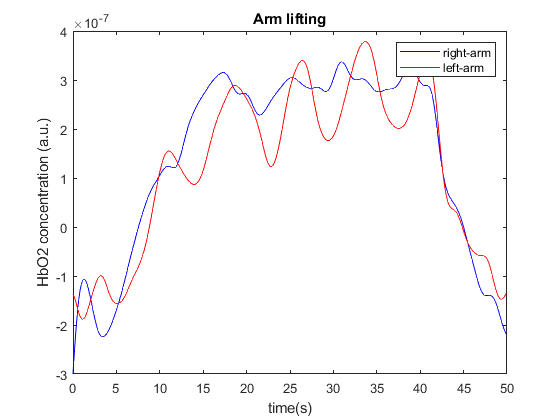

In [17]:
%% plot the block average signals
right_BlockAvg=mean(right_Hbsegment,2);
left_BlockAvg=mean(left_Hbsegment,2);

figure,
plot(taxis(1:segment_tplength),right_BlockAvg,'b'),hold on
plot(taxis(1:segment_tplength),left_BlockAvg,'r'),hold on

xlabel('time(s)')
ylabel('HbO2 concentration (a.u.)')
title('Arm lifting')
legend('right-arm','left-arm')